# Classification using an Artificial Neural Network

A simple ANN built using data from a course on Udemy called [Deep Learning A-Z](https://www.udemy.com/course/deeplearning/learn/lecture/20258078#overview). The dataset lists customers at a bank who have either stayed with the bank or chosen to leave, along with several data points for each customer such as their bank balance, credit score and geographic location. The aim of this model is to predict whether a given customer will stay or leave the bank, based on the aforementioned data points.

<br></br>
***
## Libraries

In [45]:
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [46]:
tf.__version__

'2.10.0'

<br></br>
***
## Data Preprocessing

### **Import**

In [47]:
db = pd.read_csv('Churn_Modelling.csv')

# Features - Columns 3 to 12. Credit Score to Estimated Salary
X = db.iloc[:, 3:-1].values

# Expected value - 0: Stayed  1: Left
y = db.iloc[:,-1].values

In [48]:
print(X)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]


In [49]:
print(y)

[1 0 1 ... 1 1 0]


<br></br>
### **Encoding**

#### Encode the gender column

In [50]:
# NOTE: A fit_transform combines the operations of 'fitting' the encoder (i.e: learning how to map values), before transforming the data
genderColumnTransformer = LabelEncoder()
X[:, 2] = genderColumnTransformer.fit_transform(X[:, 2])

In [51]:
print(X)

[[619 'France' 0 ... 1 1 101348.88]
 [608 'Spain' 0 ... 0 1 112542.58]
 [502 'France' 0 ... 1 0 113931.57]
 ...
 [709 'France' 0 ... 0 1 42085.58]
 [772 'Germany' 1 ... 1 0 92888.52]
 [792 'France' 0 ... 1 0 38190.78]]


#### One-hot encoding for location

ColumnTransformer is initialized with the following parameters:
- transformers: This parameter specifies the list of transformers to apply to the columns of the dataset. In this case, a tuple is provided with three elements:
- encoder': This is a string identifier for the transformer.
- OneHotEncoder(): This specifies the transformer to use for one-hot encoding. OneHotEncoder() is used to convert categorical features into one-hot encoded features.
- [1]: This specifies the indices of the columns to apply the transformer to. In this case, [1] indicates that the transformer should be applied to the column at index 1 of the dataset X.
- remainder='passthrough': This parameter specifies how to handle columns that are not specified in the transformers list. 'passthrough' indicates that these columns should be passed through without any transformation.

In [52]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [53]:
print(X)

[[1.0 0.0 0.0 ... 1 1 101348.88]
 [0.0 0.0 1.0 ... 0 1 112542.58]
 [1.0 0.0 0.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 0.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 0.0 ... 1 0 38190.78]]


<br></br>
### **Split the dataset into training and test sets**

In [54]:
# test_size: Sets the size of the test set to 20% of the original dataset
# random_state: Sets randomisation of the splitting process to zero, ensuring that the data is always split in the same way
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

<br></br>
### **Feature Scaling**

In [55]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

<br></br>
***
## Building the ANN

In [56]:
ann = tf.keras.models.Sequential()
# Input and 1st layer
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

# Second layer
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

# Output layer
# Note the use of 'sigmoid' to obtain a continuous probability output
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# 'adam' : Optimizer used during back propagation. Better than SGD as it adapts the learning rate, and uses momentum to navigate steep/shallow gradients
# 'binary_crossentropy' : Loss function that encourages the model to produce high probabilities for +ve examples, low probability for -ve examples
# 'accuracy' : Uses the number of correctly classified samples to determine the performance of the trained model
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

<br></br>
***
## Training the ANN

In [57]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
250/250 [==============================] - 1s 874us/step - loss: 0.6470 - accuracy: 0.6645
Epoch 2/100
250/250 [==============================] - 0s 880us/step - loss: 0.4935 - accuracy: 0.7940
Epoch 3/100
250/250 [==============================] - 0s 896us/step - loss: 0.4567 - accuracy: 0.7996
Epoch 4/100
250/250 [==============================] - 0s 880us/step - loss: 0.4372 - accuracy: 0.8089
Epoch 5/100
250/250 [==============================] - 0s 876us/step - loss: 0.4245 - accuracy: 0.8131
Epoch 6/100
250/250 [==============================] - 0s 860us/step - loss: 0.4147 - accuracy: 0.8183
Epoch 7/100
250/250 [==============================] - 0s 878us/step - loss: 0.4053 - accuracy: 0.8229
Epoch 8/100
250/250 [==============================] - 0s 875us/step - loss: 0.3959 - accuracy: 0.8291
Epoch 9/100
250/250 [==============================] - 0s 860us/step - loss: 0.3860 - accuracy: 0.8329
Epoch 10/100
250/250 [==============================] - 0s 847us/step - l

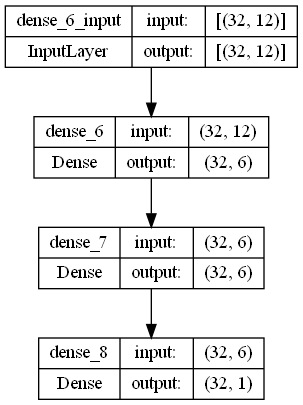

In [58]:
tf.keras.utils.plot_model(ann, show_shapes=True, show_layer_names=True)

<br></br>
***
## Predictions using the ANN

Use our ANN model to predict if the customer with the following informations will leave the bank: 

Geography: France

Credit Score: 600

Gender: Male

Age: 40 years old

Tenure: 3 years

Balance: \$ 60000

Number of Products: 2

Does this customer have a credit card ? Yes

Is this customer an Active Member: Yes

Estimated Salary: \$ 50000

In [63]:
# Using the previously defined column transformer, use one-hot encoding to convert the geographical region
geography=ct.fit_transform([[0, "France"]])
geography

array([[1.0, 0]], dtype=object)

In [64]:
gender=genderColumnTransformer.transform(["Male"])
gender

array([1])

In [65]:
inputParams = geography + [600] + gender + [ 40, 3, 60000, 2, 1, 1, 50000]

TypeError: concatenate() takes from 1 to 3 positional arguments but 10 were given